# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =(f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =  city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =  city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
      
        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | governor's harbour
City not found. Skipping...
Processing Record 2 of Set 1 | heighington
Processing Record 3 of Set 1 | ash shafa
City not found. Skipping...
Processing Record 4 of Set 1 | badger
City not found. Skipping...
Processing Record 5 of Set 1 | mgandu
City not found. Skipping...
Processing Record 6 of Set 1 | holualoa
City not found. Skipping...
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | ataq
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | urcos
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | ponta delgada
Processing Record 16 of Set 1 | novo aripuana
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | wa

Processing Record 33 of Set 4 | mount washington
Processing Record 34 of Set 4 | assare
Processing Record 35 of Set 4 | isafjordur
Processing Record 36 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 37 of Set 4 | cold lake
Processing Record 38 of Set 4 | benguela
Processing Record 39 of Set 4 | alice springs
Processing Record 40 of Set 4 | luganville
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | ostersund
Processing Record 43 of Set 4 | diego de almagro
Processing Record 44 of Set 4 | kajaani
Processing Record 45 of Set 4 | puerto santa
Processing Record 46 of Set 4 | talnakh
Processing Record 47 of Set 4 | pasargad
City not found. Skipping...
Processing Record 48 of Set 4 | klyuchi
Processing Record 49 of Set 4 | bardai
Processing Record 0 of Set 5 | mount isa
Processing Record 1 of Set 5 | bodo
Processing Record 2 of Set 5 | puerto deseado
Processing Record 3 of Set 5 | bellevue
Processing Record 4 of Set 5 | jamestown
Proc

Processing Record 24 of Set 8 | new norfolk
Processing Record 25 of Set 8 | smithers
Processing Record 26 of Set 8 | ain leuh
Processing Record 27 of Set 8 | kristiansund
Processing Record 28 of Set 8 | al majaridah
Processing Record 29 of Set 8 | oamaru
Processing Record 30 of Set 8 | weno
Processing Record 31 of Set 8 | tarancon
Processing Record 32 of Set 8 | turpan
Processing Record 33 of Set 8 | macaiba
Processing Record 34 of Set 8 | gueltat zemmour
City not found. Skipping...
Processing Record 35 of Set 8 | san angelo
Processing Record 36 of Set 8 | al jawf
Processing Record 37 of Set 8 | zaragoza
Processing Record 38 of Set 8 | voss
Processing Record 39 of Set 8 | inirida
Processing Record 40 of Set 8 | thompson
Processing Record 41 of Set 8 | alo
Processing Record 42 of Set 8 | quatre cocos
Processing Record 43 of Set 8 | el alto
Processing Record 44 of Set 8 | kapa'a
Processing Record 45 of Set 8 | al jahra'
Processing Record 46 of Set 8 | mineiros
Processing Record 47 of Set

Processing Record 14 of Set 12 | colares
Processing Record 15 of Set 12 | ceres
Processing Record 16 of Set 12 | lagos
Processing Record 17 of Set 12 | novyy urgal
Processing Record 18 of Set 12 | alta
Processing Record 19 of Set 12 | marvdasht
City not found. Skipping...
Processing Record 20 of Set 12 | wanning
Processing Record 21 of Set 12 | reynosa
Processing Record 22 of Set 12 | queenstown
Processing Record 23 of Set 12 | tabas
Processing Record 24 of Set 12 | rongelap
Processing Record 25 of Set 12 | nikolayevsk-on-amure
Processing Record 26 of Set 12 | carbonear
Processing Record 27 of Set 12 | luderitz
Processing Record 28 of Set 12 | taybad
Processing Record 29 of Set 12 | iquique
Processing Record 30 of Set 12 | dryden
Processing Record 31 of Set 12 | dakhla
Processing Record 32 of Set 12 | beyneu
Processing Record 33 of Set 12 | veinticinco de mayo
Processing Record 34 of Set 12 | rio grande
Processing Record 35 of Set 12 | ta`u
Processing Record 36 of Set 12 | ambodifotatr

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,heighington,53.2124,-0.4590,4.65,89,100,3.09,GB,1700999133
1,carnarvon,-24.8667,113.6333,22.20,71,85,7.31,AU,1700999227
2,ataq,14.5377,46.8319,29.22,19,5,4.30,YE,1700999229
3,iqaluit,63.7506,-68.5145,-10.15,73,75,1.54,CA,1700999231
4,port-aux-francais,-49.3500,70.2167,3.85,68,73,10.39,TF,1700999233


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv",index=False, header=True)

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv",encoding="ISO-8859-1")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,heighington,53.2124,-0.4590,4.65,89,100,3.09,GB,1700999133
1,carnarvon,-24.8667,113.6333,22.20,71,85,7.31,AU,1700999227
2,ataq,14.5377,46.8319,29.22,19,5,4.30,YE,1700999229
3,iqaluit,63.7506,-68.5145,-10.15,73,75,1.54,CA,1700999231
4,port-aux-francais,-49.3500,70.2167,3.85,68,73,10.39,TF,1700999233


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

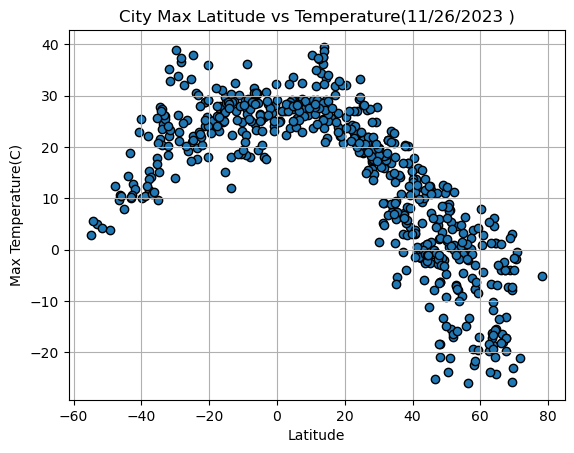

In [10]:
# Build scatter plot for latitude vs. temperature

now=pd.to_datetime("today").strftime("%m/%d/%Y")

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Max Latitude vs Temperature({now} )")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

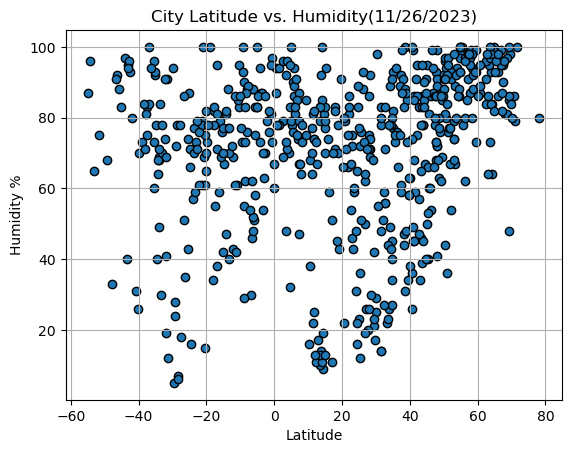

In [11]:
# Build the scatter plots for latitude vs. humidity



plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity({now})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

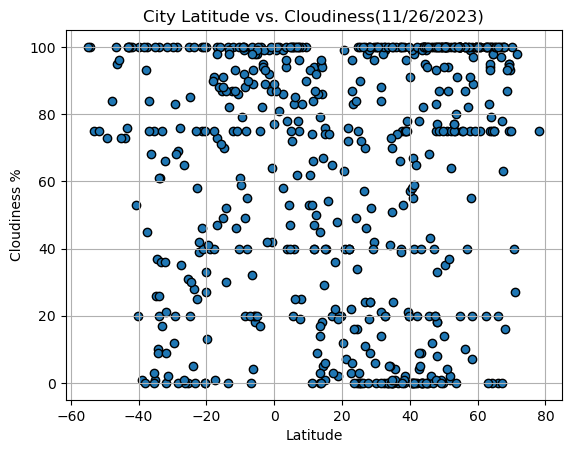

In [13]:
# Build the scatter plots for latitude vs. cloudiness



plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs. Cloudiness({now})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

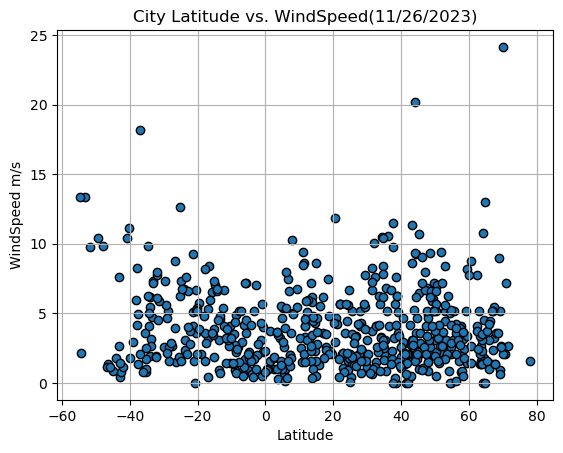

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("WindSpeed m/s")
plt.title(f"City Latitude vs. WindSpeed({now})")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression = x_values * slope + intercept
    lineeq = f"y={round(slope,2)}x +{round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression)
    plt.annotate(lineeq,(15,50),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,heighington,53.2124,-0.4590,4.65,89,100,3.09,GB,1700999133
2,ataq,14.5377,46.8319,29.22,19,5,4.30,YE,1700999229
3,iqaluit,63.7506,-68.5145,-10.15,73,75,1.54,CA,1700999231
7,albany,42.6001,-73.9662,-1.70,83,78,0.45,US,1700999239
8,ribeira grande,38.5167,-28.7000,20.22,100,75,7.60,PT,1700999240


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df =city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,carnarvon,-24.8667,113.6333,22.20,71,85,7.31,AU,1700999227
4,port-aux-francais,-49.3500,70.2167,3.85,68,73,10.39,TF,1700999233
5,urcos,-13.6861,-71.6228,11.94,77,100,0.92,PE,1700999235
6,punta arenas,-53.1500,-70.9167,5.06,65,75,13.38,CL,1700999237
10,novo aripuana,-5.1206,-60.3797,26.33,83,98,0.93,BR,1700999244


###  Temperature vs. Latitude Linear Regression Plot

The r value is 0.7562799053861248


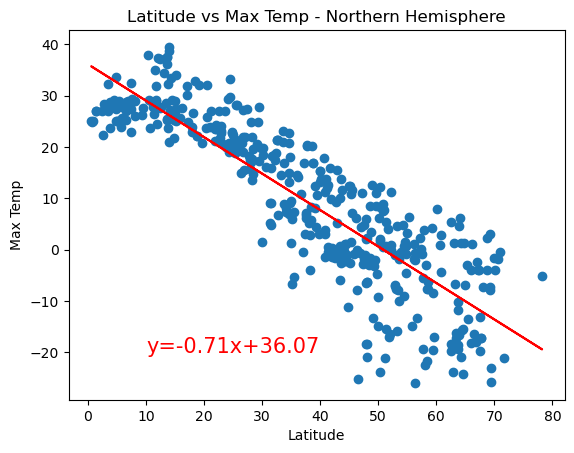

In [34]:
# Linear regression on Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hem_df["Lat"],northern_hem_df["Max Temp"])

regression= northern_hem_df["Lat"]*slope+intercept
lineeq=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Max Temp"],)
plt.plot(northern_hem_df["Lat"],regression,color="red")
plt.annotate(lineeq,(10,-20),c="red",fontsize=15)
plt.title("Latitude vs Max Temp - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r value is {rvalue**2}")
plt.show()




The r value is 0.3389434562304345


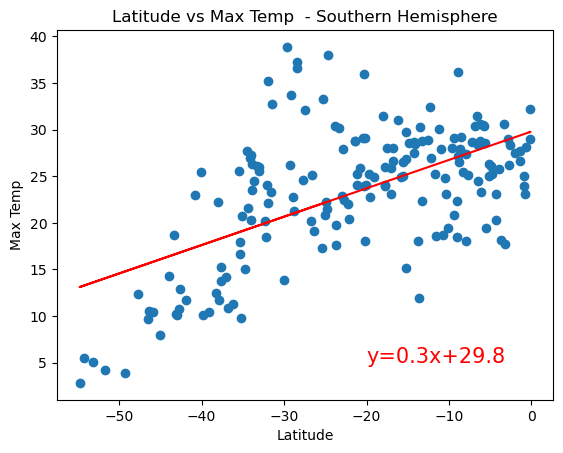

In [35]:
# Linear regression on Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hem_df["Lat"],southern_hem_df["Max Temp"])
regression= southern_hem_df["Lat"]*slope+intercept
lineeq=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Max Temp"])
plt.plot(southern_hem_df["Lat"],regression,color="red")
plt.annotate(lineeq,(-20,5),c="red",fontsize=15)
plt.title("Latitude vs Max Temp  - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r value is {rvalue**2}")
plt.show()





**Discussion about the linear relationship:** 
Northern Hemisphere:Temprature and latitude are negatively correlated.Temprature decreases with increase in latitude.Both the factors are strongly correlated.


Southern Hemisphere:Temprature and latitude are Positively correlated.Temprature Increases with increase in latitude.Both the factors are weakly correlated.

### Humidity vs. Latitude Linear Regression Plot

 The r value is 0.1277836095161418


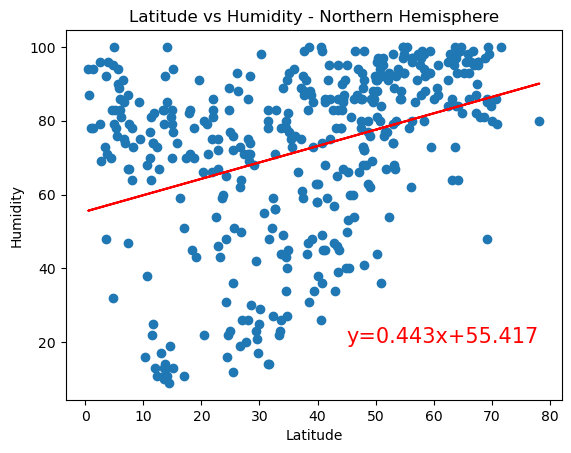

In [36]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hem_df["Lat"],northern_hem_df["Humidity"])

regression= northern_hem_df["Lat"]*slope+intercept
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Humidity"])
plt.plot(northern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(45,20),c="red",fontsize=15)
plt.title("Latitude vs Humidity - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print (f" The r value is {rvalue**2}")
plt.show()


 The r value is 0.0018666717684095798


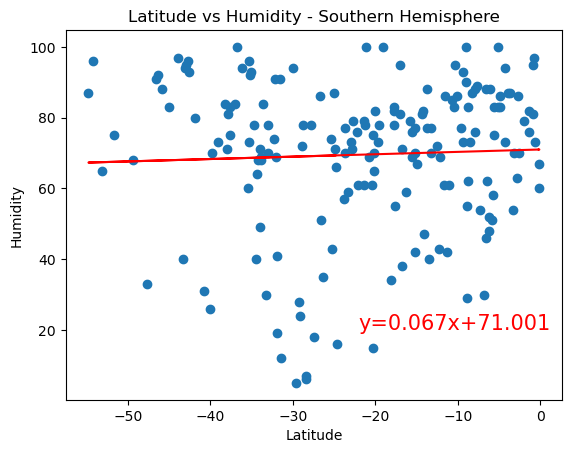

In [37]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hem_df["Lat"],southern_hem_df["Humidity"])

regression= southern_hem_df["Lat"]*slope+intercept
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Humidity"])
plt.plot(southern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(-22,20),c="red",fontsize=15)
plt.title("Latitude vs Humidity - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print (f" The r value is {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** 

Northern Hemisphere:There is no or  very weak correlation between latitude and humidity


Southern Hemisphere:There is no or  very weak correlation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

 The r value is 0.022847635700113667


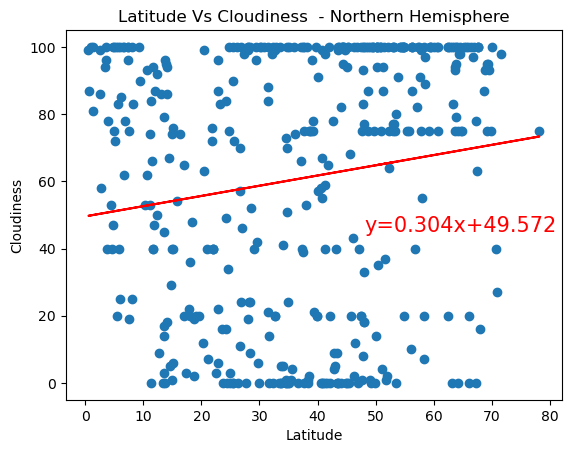

In [38]:
# Northern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hem_df["Lat"],northern_hem_df["Cloudiness"])

regression= northern_hem_df["Lat"]*slope+intercept
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Cloudiness"])
plt.plot(northern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(48,45),c="red",fontsize=15)
plt.title("Latitude Vs Cloudiness  - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print (f" The r value is {rvalue**2}")
plt.show()


 The r value is 0.008118837004783832


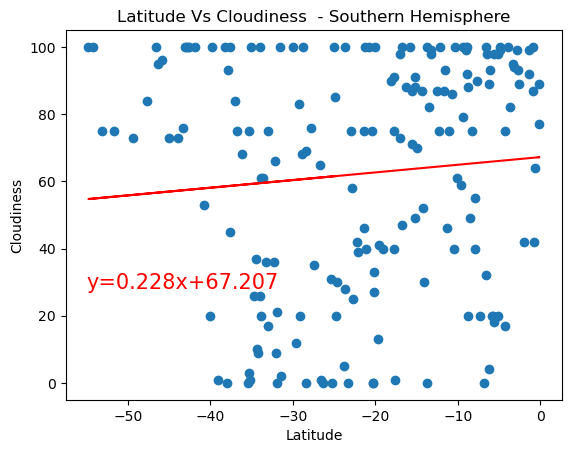

In [39]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hem_df["Lat"],southern_hem_df["Cloudiness"])


regression= southern_hem_df["Lat"]*slope+intercept
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Cloudiness"])
plt.plot(southern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(-55,28),c="red",fontsize=15)
plt.title("Latitude Vs Cloudiness  - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print (f" The r value is {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** 

Northern Hemisphere:There is no  or very weak correlation between Latitude and Cloudiness

Southern Hemisphere:There is no  or very weak correlation between Latitude and Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.002358761735640485


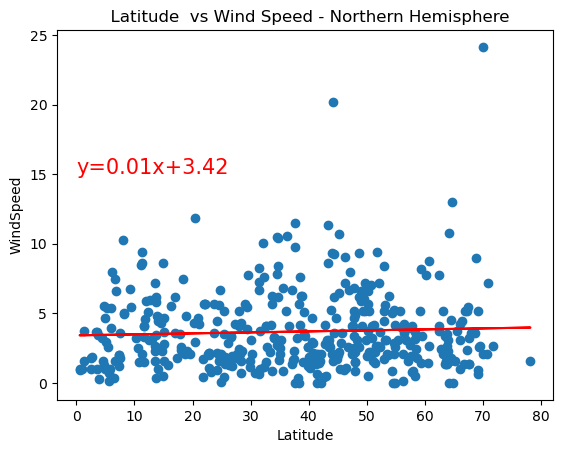

In [40]:
# Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hem_df["Lat"],northern_hem_df["Wind Speed"])
regression= northern_hem_df["Lat"]*slope+intercept

plt.scatter(northern_hem_df["Lat"],northern_hem_df["Wind Speed"])
plt.plot(northern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,2)}x+{round(intercept,2)}",(0,15),c="red",fontsize=15)
plt.title("  Latitude  vs Wind Speed - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
print(f"The r value is {rvalue**2}")
plt.show()


The r value is 0.08127642397218143


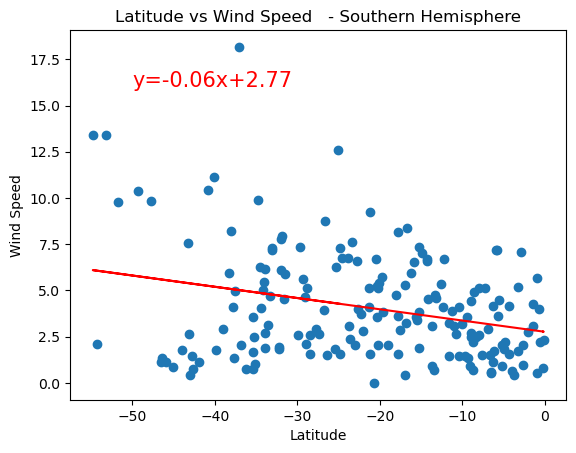

In [41]:
# Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hem_df["Lat"],southern_hem_df["Wind Speed"])
regression= southern_hem_df["Lat"]*slope+intercept

plt.scatter(southern_hem_df["Lat"],southern_hem_df["Wind Speed"],)

plt.plot(southern_hem_df["Lat"],regression, c="red")
plt.annotate(f"y={round(slope,2)}x+{round(intercept,2)}",(-50,16),c="red",fontsize=15)
plt.xlabel( "Latitude" )
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed   - Southern Hemisphere")
print(f"The r value is {rvalue**2}")
plt.show()


**Discussion about the linear relationship:**

Northern Hemisphere:There is no  or very weak correlation between Latitude and WindSpeed

Southern Hemisphere:There is no  or very weak correlation between Latitude and WindSpeed